In [66]:
import sys
sys.path.append("/home/edo/Software/TESI/AstroCosmoComputational/Students/Martinelli_Edoardo/")
import numpy as np
import matplotlib.pyplot as plt
from pylab import figure, cm
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
# Import distances class
from pyACC.cosmology import *
# Import integration class
from pyACC.Calculus import *
import scipy as sp
import scipy.integrate as integrate
import sympy as sym

In [67]:
z0=2
def fix_DM_func(var,om=1,h0=1,w=1):
    if type(var)!=str:
        raise ValueError("var must be a string")
    if var=="om":
        return lambda x: distance_modulus(z0,omegaM=x,H0=h0,wde=w,omegaLam=1-x)
    elif var=="h0":
        return lambda x: distance_modulus(z0,omegaM=om,H0=x,wde=w,omegaLam=1-om)
    elif var=="w":
        return lambda x: distance_modulus(z0,omegaM=om,H0=h0,wde=x,omegaLam=1-om)

In [68]:
omM=0.3
Wde=-1
H_0=70

# distance modulus as a function of H0, fixing omegaM=0.3 and wde=-1
DM_H0=Funct(fix_DM_func("h0",om=omM,w=Wde))
# distance modulus as a function of omegaM, fixing H0=70 and wde=-1
DM_omegaM=Funct(fix_DM_func("om",h0=H_0,w=Wde))
# distance modulus as a function of wde, fixing H0=70 and omegaM=0.3
DM_wde=Funct(fix_DM_func("w",h0=H_0,om=omM))

Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables
Function object created, you've inserted a  <class 'function'>  function with  1  variables


In [69]:
OmM_arr=np.linspace(0.25,0.35,1000)
H0_arr=np.linspace(60,80,1000)
wde_arr=np.linspace(-1.5,-0.5,1000)

DM_H0_arr=np.zeros(H0_arr.size)
for i,h0i in enumerate(H0_arr):
    DM_H0_arr[i]=DM_H0.Val(h0i)
DM_omegaM_arr=np.zeros(OmM_arr.size)
for i,omi in enumerate(OmM_arr):
    DM_omegaM_arr[i]=DM_omegaM.Val(omi)
DM_wde_arr=np.zeros(wde_arr.size)
for i,wi in enumerate(wde_arr):
    DM_wde_arr[i]=DM_wde.Val(wi)
    
der_DM_H0=DM_H0.Der(H0_arr)
der_DM_omegaM=DM_omegaM.Der(OmM_arr)
der_DM_wde=DM_wde.Der(wde_arr)

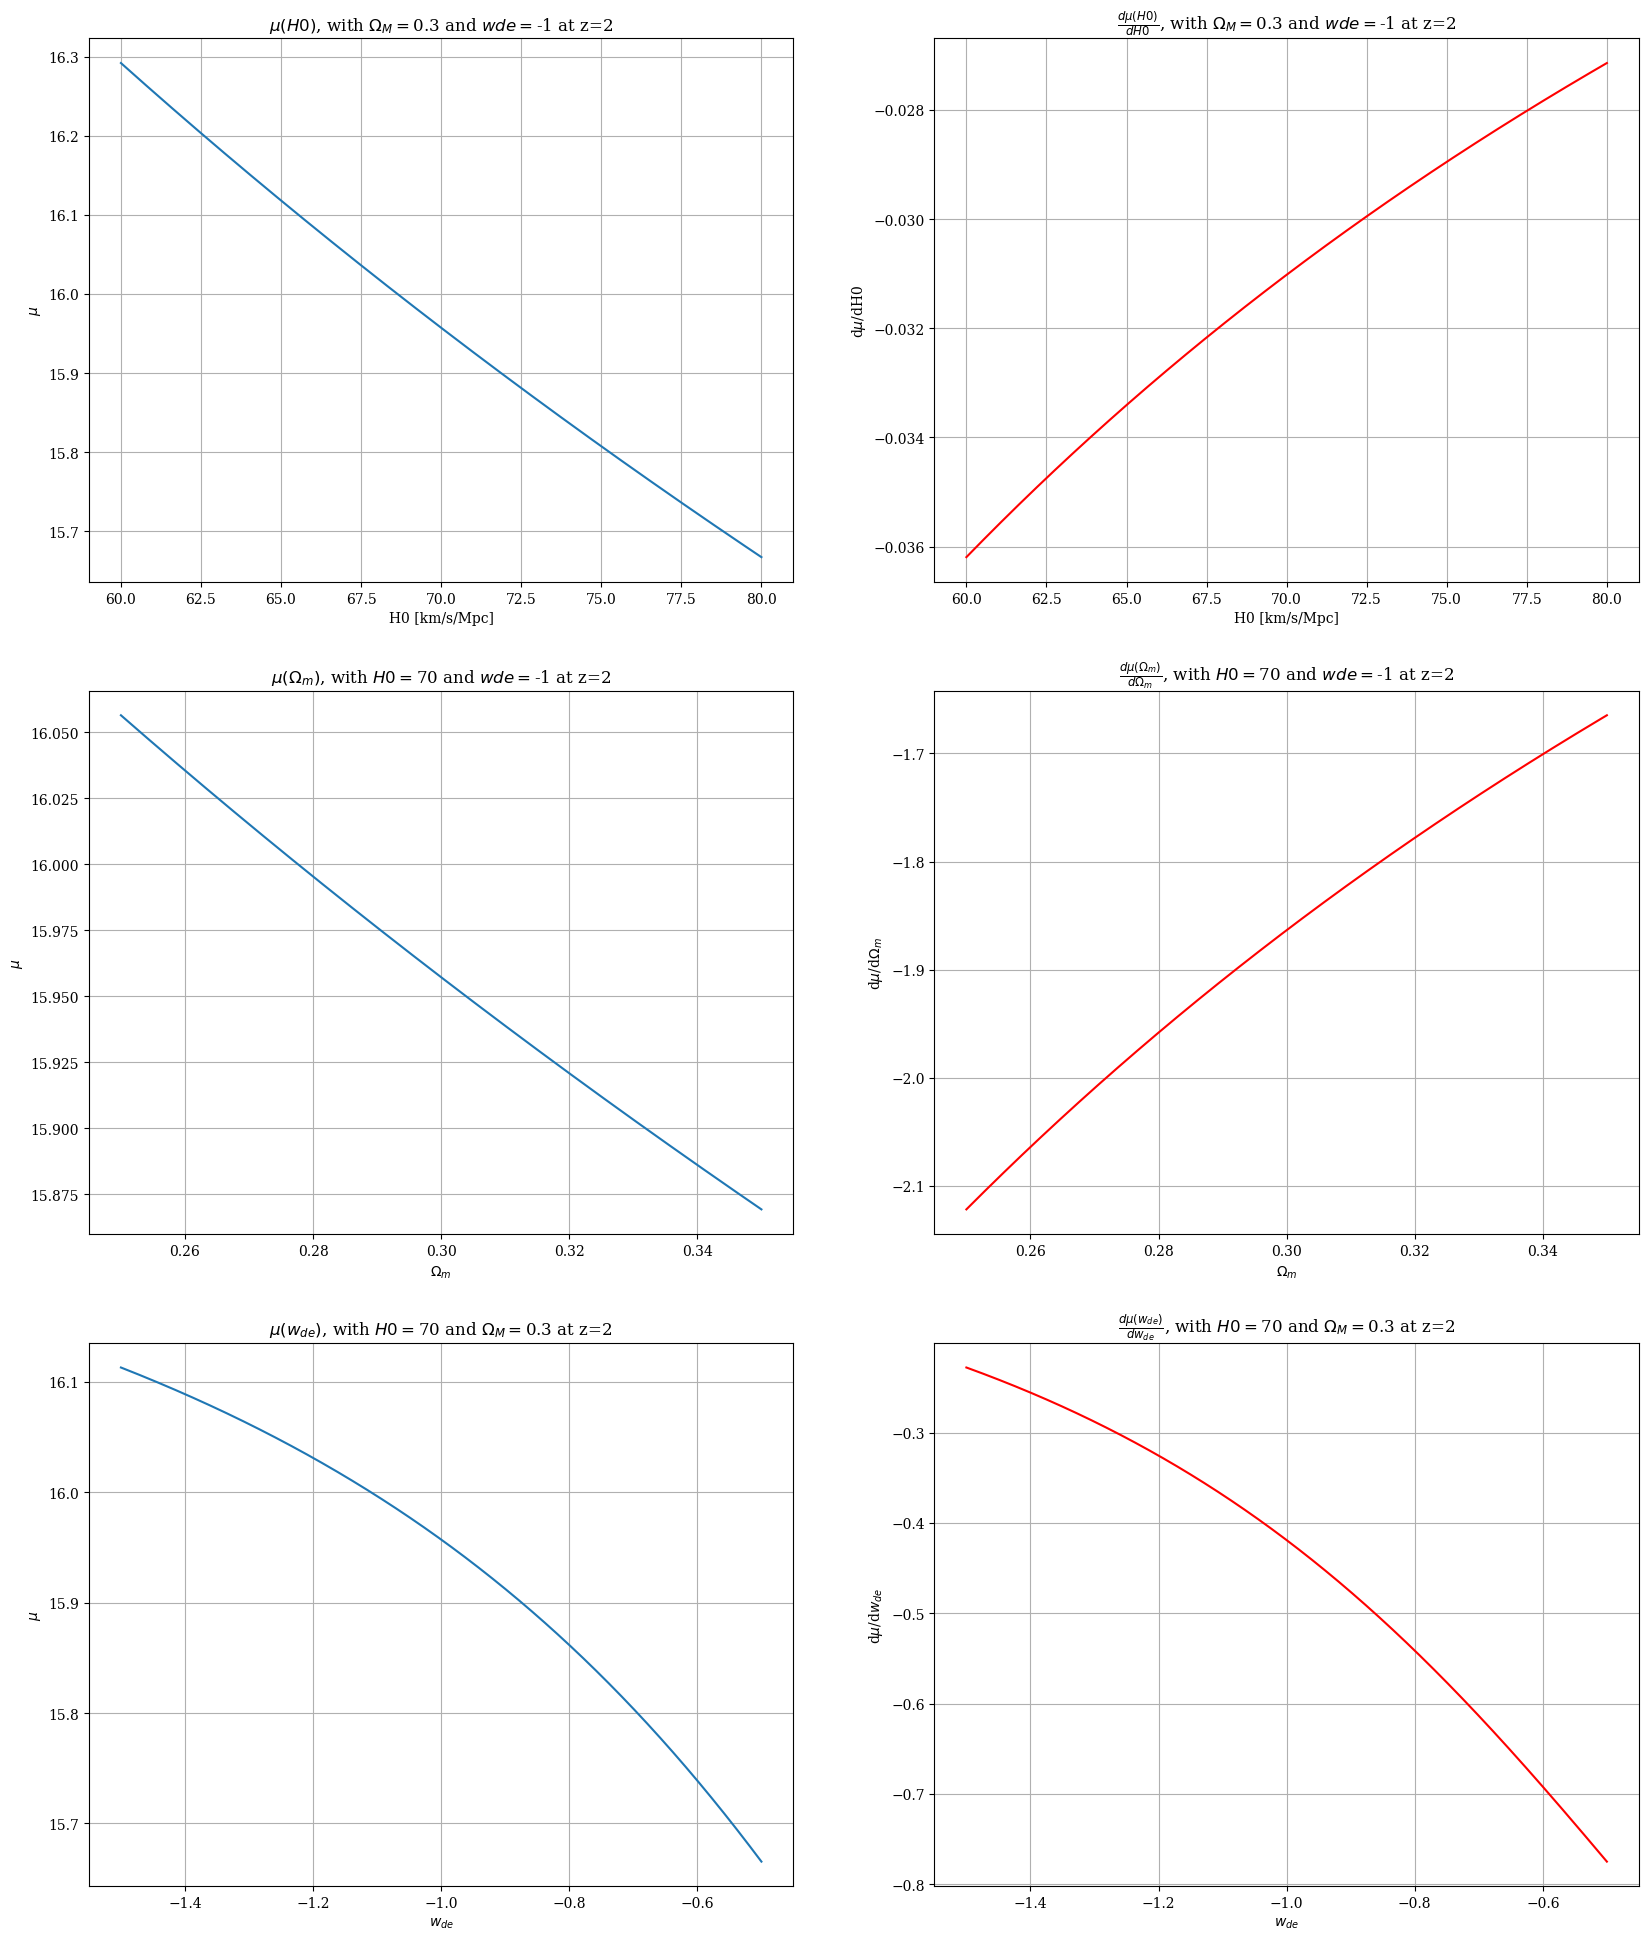

In [70]:
# plots

fig,ax=plt.subplots(3,2,figsize=(20,24))
ax[0,0].title.set_text(r"$\mu(H0)$, with $\Omega_M= $"+str(omM) +" and $wde= $" +str(Wde)+" at z="+str(z0))
ax[0,0].set_xlabel("H0 [km/s/Mpc]")
ax[0,0].set_ylabel("$\mu$")
ax[0,0].plot(H0_arr,DM_H0_arr)
ax[0,0].grid()
ax[0,1].title.set_text(r"$\frac{d\mu(H0)}{dH0}$, with $\Omega_M= $"+str(omM) +" and $wde= $" +str(Wde)+" at z="+str(z0))
ax[0,1].set_xlabel("H0 [km/s/Mpc]")
ax[0,1].set_ylabel("d$\mu$/dH0")
ax[0,1].plot(H0_arr,der_DM_H0,color="red")
ax[0,1].grid()

ax[1,0].title.set_text(r"$\mu(\Omega_m)$, with $H0= $"+str(H_0) +" and $wde=$" +str(Wde)+" at z="+str(z0))
ax[1,0].set_xlabel("$\Omega_m$")
ax[1,0].set_ylabel("$\mu$")
ax[1,0].plot(OmM_arr,DM_omegaM_arr)
ax[1,0].grid()
ax[1,1].title.set_text(r"$\frac{d\mu(\Omega_m)}{d\Omega_m}$, with $H0= $"+str(H_0) +" and $wde=$" +str(Wde)+" at z="+str(z0))
ax[1,1].set_xlabel("$\Omega_m$")
ax[1,1].set_ylabel("d$\mu$/d$\Omega_m$")
ax[1,1].plot(OmM_arr,der_DM_omegaM,color="red")
ax[1,1].grid()

ax[2,0].title.set_text(r"$\mu(w_{de})$, with $H0= $"+str(H_0) +" and $\Omega_M= $"+str(omM) +" at z="+str(z0))
ax[2,0].set_xlabel("$w_{de}$")
ax[2,0].set_ylabel("$\mu$")
ax[2,0].plot(wde_arr,DM_wde_arr)
ax[2,0].grid()
ax[2,1].title.set_text(r"$\frac{d\mu(w_{de})}{dw_{de}}$, with $H0= $"+str(H_0) +" and $\Omega_M= $"+str(omM) +" at z="+str(z0))
ax[2,1].set_xlabel("$w_{de}$")
ax[2,1].set_ylabel("d$\mu$/d$w_{de}$")
ax[2,1].plot(wde_arr,der_DM_wde,color="red")
ax[2,1].grid()


For the analitic derivative there's a problem right now. How can I write in sympy notation the function distance modulus? It's not easy and, even if it's possible, I have to redefine all the distances functions and I can't use the class we've implemented!